![Astrofisica Computacional](../../logo.png)

---
## Archivos `FITS` (Imágenes) I


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Resumen

En este cuaderno utilizaremos `astropy` para leer un archivo .fits y visualizar su contenido como una imágen astronómica.

---

El formato [Flexible Image Transport System](https://fits.gsfc.nasa.gov/fits_documentation.html) (FITS) es utilizado ampliamente dentro de la comunidad astrónomica para almacenar imágenes, espectros, tablas, etc.

El formato FITS fue inventado en el entorno de la astronomía y se sigue utilizando debido a su estructura simple, eficiente y lógica y porque la información **NO esta comprimida**. Esto significa que la información se alamacena con la resolución original y no se requiere un software espcializado para descomprimir y acceder a ella.

---

En este cuaderno, se utilziará una imágen .fits de la Horse Head Nebula, obtenida de 

http://data.astropy.org/tutorials/FITS-images/HorseHead.fits


La información detallada del manejo de archivos .fits con  `astropy` se encuentra en

http://docs.astropy.org/en/stable/io/fits/index.html

---

## 1. Abrir y cerrar un archivo .fits 

El primer paso para acceder al archivo es abrirlo mediante la función `astropy.io.fits.open()`. Esta función retorna un objeto llamado **HDUList**  (**H**eader **D**ata **U**nits **List**). Aqui llamaremos a este objeto `hdul`.

In [1]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np
%matplotlib inline


hdul = fits.open('HorseHead.fits')
hdul

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1079dfd90>, <astropy.io.fits.hdu.table.TableHDU object at 0x122562280>]

El método `.info()` entregará un resumen de los contenidos del archivo FITS,

In [2]:
hdul.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


En general, pueden existir varias unidades de información, denotadas por los nombres  `hdul[0]`, `hdul[1]`, etc. La unidad `hdul[0]`, se denomina la unidad PRIMARIA (PRIMARY) y suele contener el acceso inicial a  la información del archivo (por ejemplo el numero de tarjetas, dimensiones, formato, etc.).  En las demás unidades existe información adicional relevante, comp por ejemplo mascaras, filtros, etc.  

Luego de acceder a esta información, y si no se va realizar otra acción, es recomendable cerrar el archivo para evitar corromperlo,

In [3]:
hdul.close()

Una forma eficiente de acceder a la información, abriendo y cerrando el archivo automáticamente, es

In [4]:
with fits.open('HorseHead.fits') as hdul:
    hdul.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


### 1.1. Encabezados y Datosd (Headers y Data)

Cada objeto HDU contiene los atributos `.header` y `.data`. Utilizando el atributo `header` es posible acceder al encabezado del objeto HDU, el cual contiene toda la información de esta unidad de datos,

In [5]:
hdul[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

Aqui se encuentra una gran cantidad de información, como por ejemplo: ORIGIN, DATE, RA, DEC, TELESCOPE, FILTER, etc. Para acceder a cada una de ellas se puede utilizar

In [6]:
hdul[0].header['ORIGIN']

'STScI/MAST'

NOTA: Para comprender completametne la información almacenada debe remitirse a la fuente del archivo (base de datos, pagina web, docuemntación, etc.)

---

Por otra parte, el atributo `data` da acceso a la información almacenada en la unidad HDU. Por ejemplo, en el caso espcífico que estamos trabajando, asignaremos esta información a la variable image_data.

**Nota: Es importante asignar esta información antes de cerrar el archivo!**

In [7]:
hdul = fits.open('HorseHead.fits')
image_data = hdul[0].data
hdul.close()

La información se ha guardado como un arreglo NumPy,

In [8]:
type(image_data)

numpy.ndarray

In [9]:
image_data.shape

(893, 891)

De esta forma podemos acceder fácilmente a los datos,

In [10]:
image_data[10:15 , 20:30]

array([[7809, 7670, 7670, 7460, 7180, 6761, 6761, 6901, 7180, 7041],
       [7565, 7285, 7565, 7425, 7425, 7285, 7285, 7250, 7250, 7390],
       [7006, 7285, 7006, 6866, 7425, 7285, 7285, 7530, 7530, 7670],
       [6866, 7425, 7146, 7146, 7705, 7285, 7285, 7670, 7670, 7390],
       [7146, 7146, 6866, 7146, 7705, 7285, 6726, 7111, 7670, 7390]],
      dtype=int16)

También podemos obtener información estadistica de importancia,

In [11]:
np.min(image_data)

3759

In [12]:
np.max(image_data)

22918

In [13]:
np.mean(image_data)

9831.481676287574

## 2. Visualización de la Imaágen

Para el archivo que estamos considerando, la información almacenada corresponde a una imagen fotométrica de la nebulosa. De esta forma, podemos utilizar una función como [matplotlib.pyplot.imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) oara visualizar la imagen

http://learn.astropy.org/rst-tutorials/FITS-images.html?highlight=filtertutorials



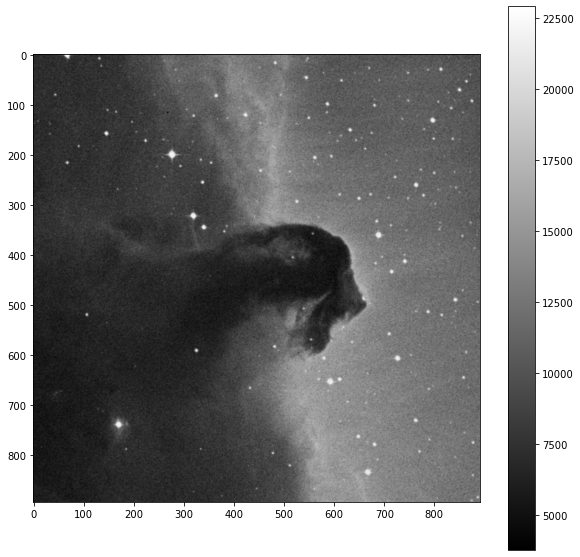

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

El mapa de color 'gray'puede cambiarse. [Hay multiples opciones](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

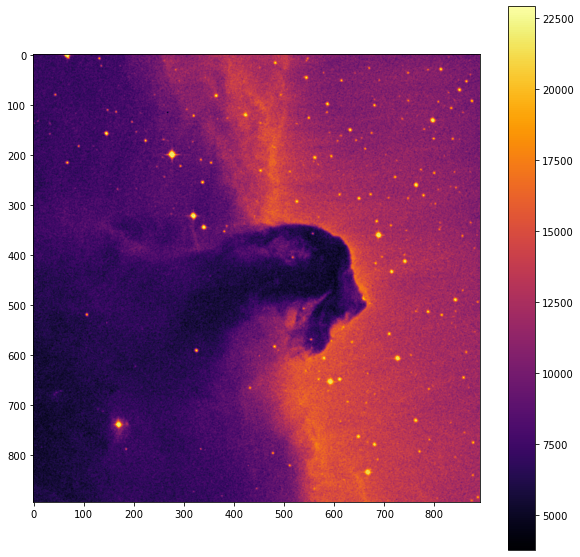

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='inferno')
plt.colorbar()
plt.show()

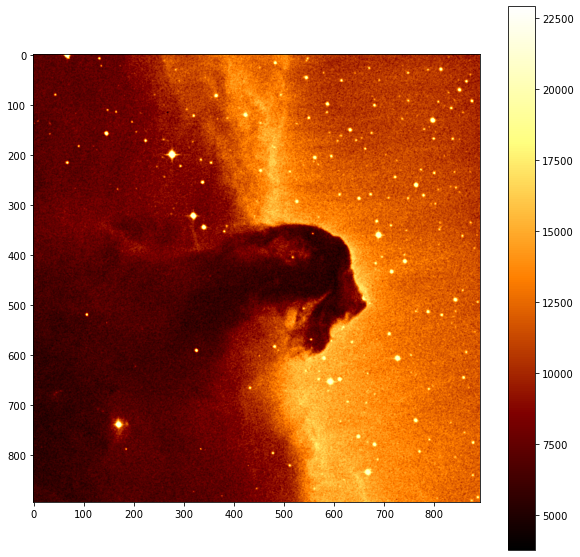

In [16]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='afmhot')
plt.colorbar()
plt.show()

Adicionalmente se puede utilizar una escala de color logaritmica para resaltar los detalles mediante la función [matplotlib.colors.LogNorm](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.colors.LogNorm.html). 

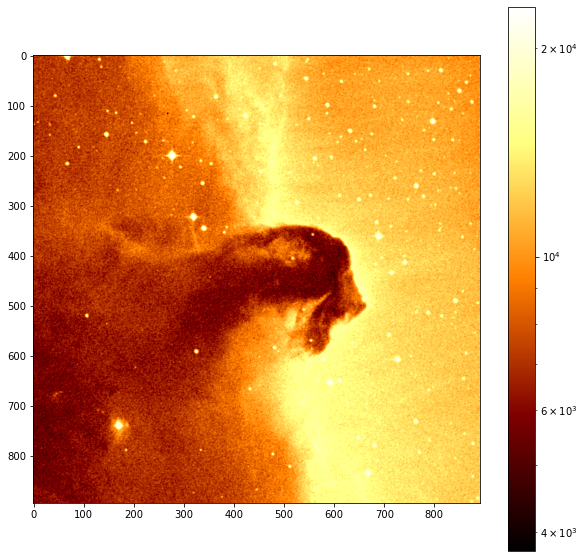

In [17]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='afmhot', norm=LogNorm())
plt.colorbar()
plt.show()

### 2.1. Histograma 

Los datos en el arrglo 2D pueden aplanarse,

In [18]:
flat_data = image_data.flatten()

y con ello se puede construir un histograma para visualizar que valores (colores) aparecen dentro de la imagen [matplotlib.pyplot.hist( )](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html)

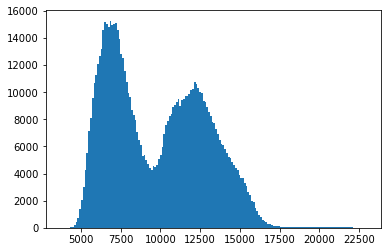

In [19]:
plt.hist(flat_data, bins='auto') 
plt.show()

Con esta información es posible volver a realizar la visualización de la imagen eliminando algunos de los puntos con el fin de realzar detalles y mejorar la imagen,ues to improve the visualization

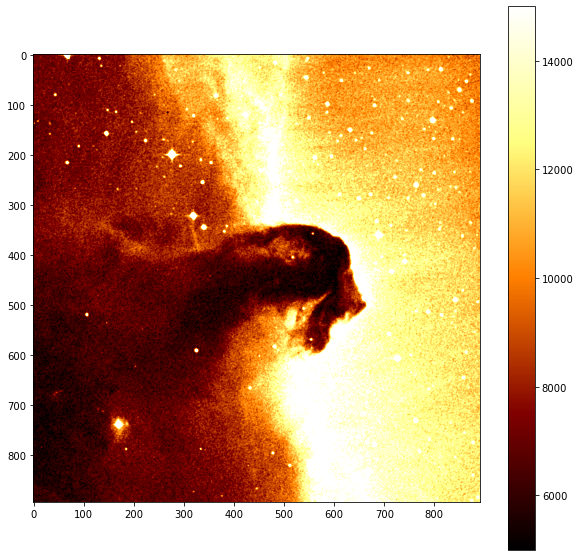

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(image_data, cmap='afmhot', vmin=5E3, vmax=1.5E4)
plt.colorbar()
plt.show()